In [6]:
## Step 1: Importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [7]:
##Step 2: Data Collection and Loading

df=pd.read_csv("Austin-2019-01-01-to-2023-07-22.csv")

In [11]:
##Step 3: Data Preprocessing 
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
df = df.dropna(subset=features + [target])


In [13]:
##Step 4: Feature Selection
x = df[features]
y = df[target]

In [15]:
##Step 5: Model Training
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.20,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
##Step 6: Model Evaluation
y_pre=model.predict(x_test)

mean_squared_error: 0.04974770851826499
root mean_squared_error: 0.22304194340586478
r2_score: 0.1661984442789477


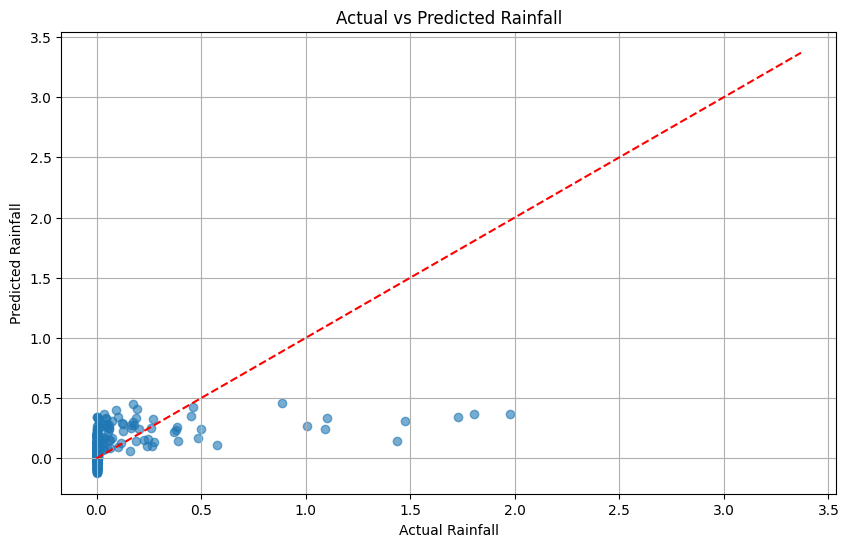

In [24]:
##Step 7: Prediction and Visualziing Results
mse=mean_squared_error(y_test,y_pre)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pre)

print(f"mean_squared_error: {mse}")
print(f"root mean_squared_error: {rmse}")
print(f"r2_score: {r2}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pre,alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

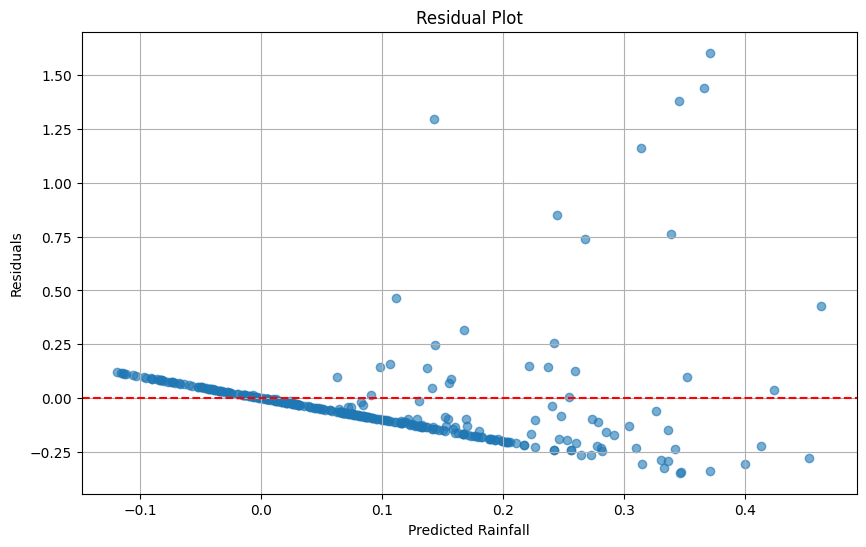

In [26]:
residuals = y_test - y_pre
plt.figure(figsize=(10,6))
plt.scatter(y_pre, residuals,alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [27]:
import joblib
joblib.dump(model, "rainfall_model.pkl")


['rainfall_model.pkl']